Základní práce s rastrovými daty v R
------------------------------------------------------

základní syntaxe R

In [ ]:
x<-1
y<-2

x+y

print(x+y)

In [ ]:
x=4

x

x==3

In [9]:
vec<-c(1,2,5,4,789)

In [10]:
for (i in vec){
    print(i**2)}

[1] 1
[1] 4
[1] 25
[1] 16
[1] 622521


In [11]:
if (length(vec)==5){
    print(vec)}

[1]   1   2   5   4 789


Nápověda k funkcím


In [1]:
?length

Práce s rastrovými daty
-----------------------------------

In [12]:
library(raster)

In [13]:
dat<-raster("../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B12.tiff")

In [14]:
dat

class       : RasterLayer 
dimensions  : 715, 938, 670670  (nrow, ncol, ncell)
resolution  : 19.98146, 19.9881  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/kalab/gismentors/geopython-english/data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B12.tiff 
names       : S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B12 
values      : 0, 65535  (min, max)


Proměnné rastrové vrstvy

In [16]:
dat@crs

CRS arguments:
 +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84
+towgs84=0,0,0 

In [17]:
dat@extent

class       : Extent 
xmin        : 411805.9 
xmax        : 430548.5 
ymin        : 5535699 
ymax        : 5549990 

In [ ]:
extent(dat)

RasterStack - "balíček" rastrů o stejném rozlišení a extentu ( v našem případě RasterStack může reprezentovat jeden družicový snímek a jednotlivé vrstvy pásma


In [19]:
dat_s<-stack("../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B12.tiff")

In [21]:
dat_s

class       : RasterStack 
dimensions  : 715, 938, 670670, 1  (nrow, ncol, ncell, nlayers)
resolution  : 19.98146, 19.9881  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B12 
min values  :                                            0 
max values  :                                        65535 


Přídání všech .tiff souborů ze složky do stacku

In [24]:
raster_data_list<-list.files(path="../../data/sentinel", pattern=".tiff$",full.name=T)

In [25]:
raster_data_list

[1] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B01.tiff"
 [2] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B02.tiff"
 [3] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B03.tiff"
 [4] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B04.tiff"
 [5] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B05.tiff"
 [6] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B06.tiff"
 [7] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B07.tiff"
 [8] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B08.tiff"
 [9] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B09.tiff"
[10] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B10.tiff"
[11] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B11.tiff"
[12] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B12.tiff"
[13] "../../data/sentinel/S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B8A.tiff"

In [27]:
dat_s<-stack(raster_data_list)

ERROR: Error in compareRaster(rasters): different number or columns


zkontrolujeme jestli jsou rastry stejného rozlišení

In [26]:
for (i in raster_data_list){
    print(raster(i)@ncols)
    }

[1] 313
[1] 1875
[1] 1875
[1] 1875
[1] 938
[1] 938
[1] 938
[1] 1875
[1] 313
[1] 313
[1] 938
[1] 938
[1] 938


Zjistili jsme že se jednotlivé snímky liší, vybereme tedy pouze ty se stejným rozlišením.

In [32]:
dat_s<-stack(raster_data_list[c(2:4,8)])

dat_s

[1] "S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B02"
[2] "S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B03"
[3] "S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B04"
[4] "S2A_OPER_MSI_L1C_TL_EPA__20160605T113933_B08"

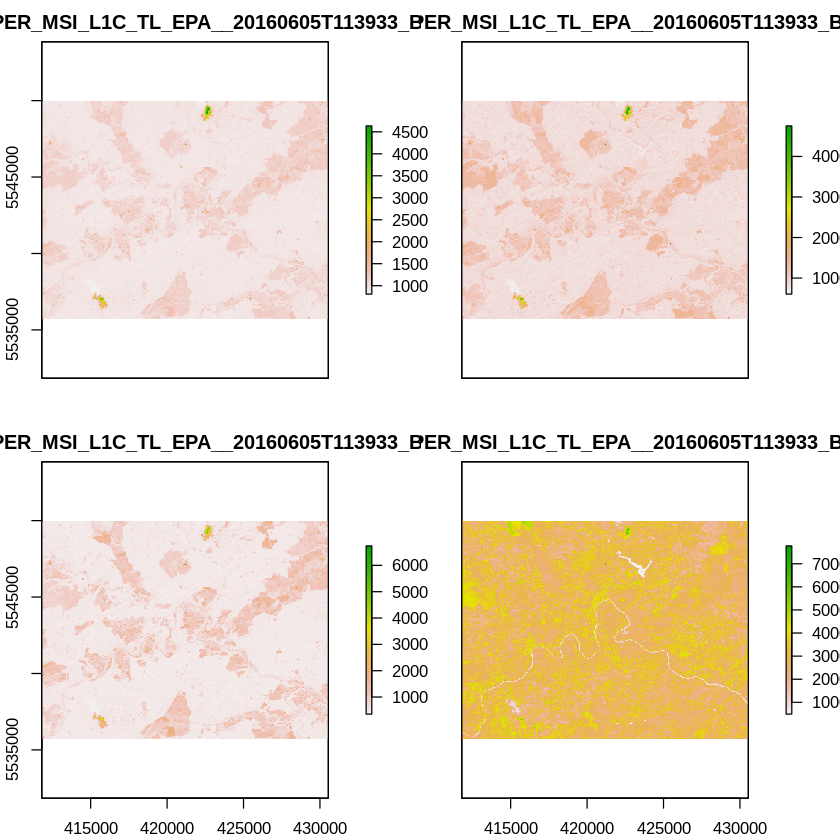

In [34]:
bplot(dat_s)

In [40]:
names(dat_s)
names(dat_s)<-c("B","G","R","NIR")
dat_s

[1] "b"   "g"   "r"   "nir"

class       : RasterStack 
dimensions  : 1430, 1875, 2681250, 4  (nrow, ncol, ncell, nlayers)
resolution  : 9.996058, 9.994048  (x, y)
extent      : 411805.9, 430548.5, 5535699, 5549990  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       :     B,     G,     R,   NIR 
min values  :     0,     0,     0,     0 
max values  : 65535, 65535, 65535, 65535 


Funkce raster::plotRGB umožňuje zobrazit rgb syntézu snímku:

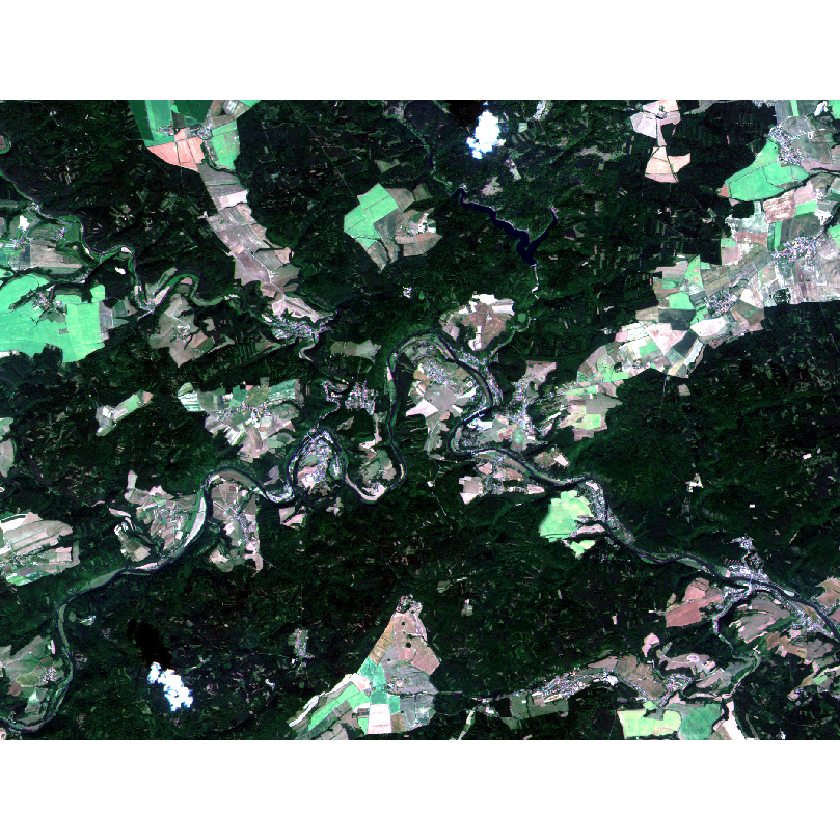

In [43]:
plotRGB(dat_s,r=3,g=2,b=1,stretch="lin")